<font size="5">**Project 2 - Logistic Regression**</font>

Learning Outcomes:
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model 
* Modelevaluation

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

Steps and tasks:

**1.** Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. **(5 marks)**

In [1]:
# Import libraries

import numpy as np                    # linear algebra
import pandas as pd                   # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#Visualization libraries
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns
import missingno as msno

# Display libraries
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Visualize top of the data
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [3]:
# Check datatypes
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
# Statistical summary
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.10,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.47,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [5]:
# shape
data.shape

(5000, 14)

In [6]:
# Find null values 
data.isnull().values.any()

False

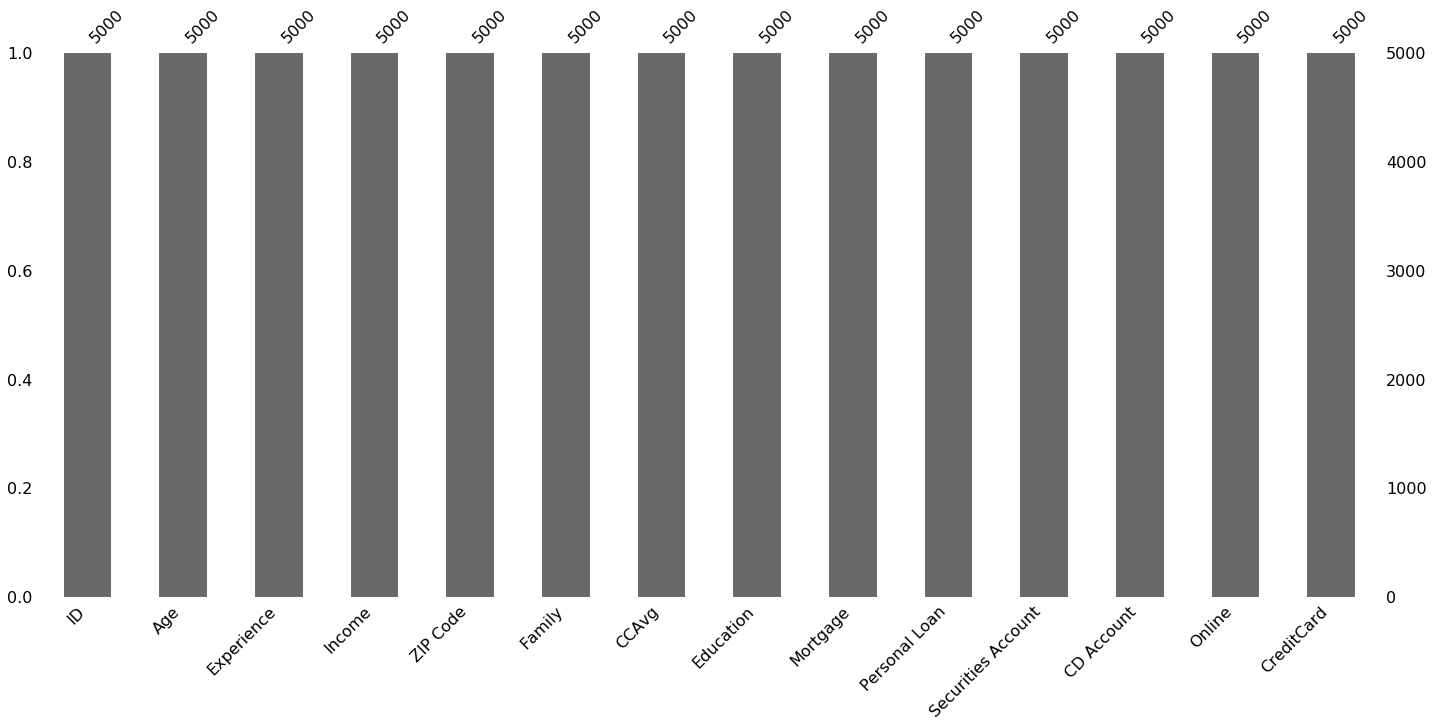

In [7]:
# Visualize the data to identify missing values
msno.bar(data);

In [8]:
# Incorrect imputations

<div class="alert-info">
<b>Answer:</b> Looking at the attribute information, we infer that value imputation is not a good strategy for this problem since the attributes that have zero values are critical for establishing if the customer can be given a loan.
</div>

**Attribute Information:**
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer in (000)
* Zip Code: Home Address ZIP code
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (000)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

**2.** EDA: Study the data distribution in each attribute and target variable, share your findings **(20 marks)**
    * Number of unique in each column?
    * Number of people with zero mortgage?
    * Number of people with zero credit card spending per month?
    * Value counts of all categorical columns.
    * Univariate and Bivariate
    * Get data model ready

<div class="alert-info">
<b>Findings:</b> 

<ul>
  <li>There is a positive correlation between income, CCavg, and personal loan, which makes sense since income is usually the driver for the other two</li>
  <li>Avg income in the population is 73K, but there is a group of outliers that are aboive 200K</li>
  <li>The new version * Avg age is 45</li>
  <li>75% of the pop spends around 2.5K in credit cards, with a small group of outliers that go up to 10K spend</li>
  <li>75% of the pop has an advanced/professional education</li>
  <li>70% of th epopulation have no mortgage or credit card so that means their income is not committed to those type of payments, which makes them potentially a good candidate for a loan</li>
</ul>
</div>

In [9]:
# Identify uniques in each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
# Number of people with Zero mortgage
people_no_mortgage = data['Mortgage'][data['Mortgage'] == 0].count()

# Print totals and percentages
print (f'People with Zero Mortgage', people_no_mortgage)
print (f'Percentage of People with Zero Mortgage %', ((people_no_mortgage/len(data)*100)))
print()

# Number of people with zero credit card spending per month
people_no_credit = data['CreditCard'][data['CreditCard'] == 0].count()

# Print totals and percentages
print (f'People with Zero Credit', people_no_credit)
print (f'Percentage of People with Zero Credit %', ((people_no_credit/len(data)*100)))

# Value counts of all categorical columns
data.select_dtypes(exclude=['int', 'float']).columns
data.select_dtypes(include=['category', object]).columns

People with Zero Mortgage 3462
Percentage of People with Zero Mortgage % 69.24

People with Zero Credit 3530
Percentage of People with Zero Credit % 70.6


Index([], dtype='object')

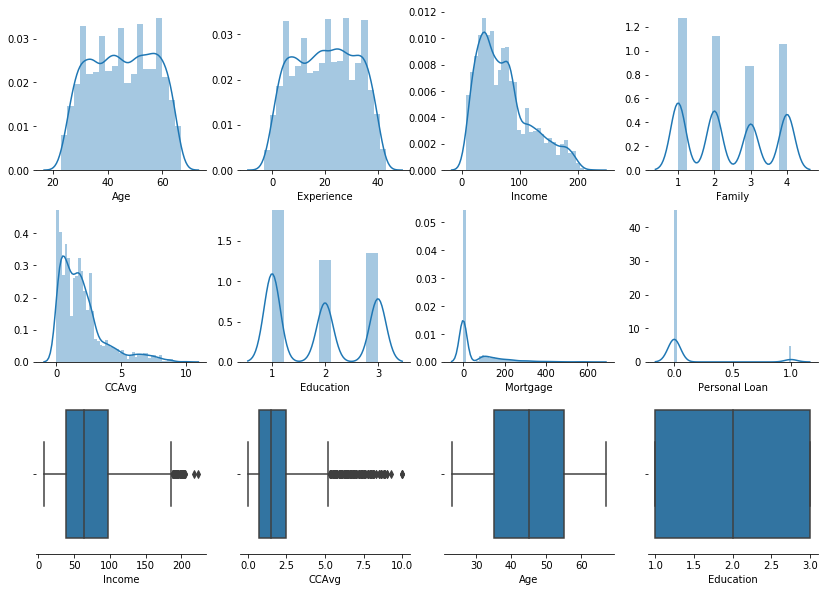

In [11]:
# Univariate analysis

# Set up the matplotlib figure
f, axes = plt.subplots(3,4, figsize=(14, 10))
sns.despine(left=True)

# Plot histogram and plot box for each variable that is relevant
sns.distplot(data['Age'],ax=axes[0,0]);
sns.distplot(data['Experience'],ax=axes[0,1]);
sns.distplot(data['Income'],ax=axes[0,2]);
sns.distplot(data['Family'],ax=axes[0,3]);
sns.distplot(data['CCAvg'],ax=axes[1,0]);
sns.distplot(data['Education'],ax=axes[1,1]);
sns.distplot(data['Mortgage'],ax=axes[1,2]);
sns.distplot(data['Personal Loan'],ax=axes[1,3]);
sns.boxplot(data['Income'],ax=axes[2,0]);
sns.boxplot(data['CCAvg'],ax=axes[2,1]);
sns.boxplot(data['Age'],ax=axes[2,2]);
sns.boxplot(data['Education'],ax=axes[2,3]);

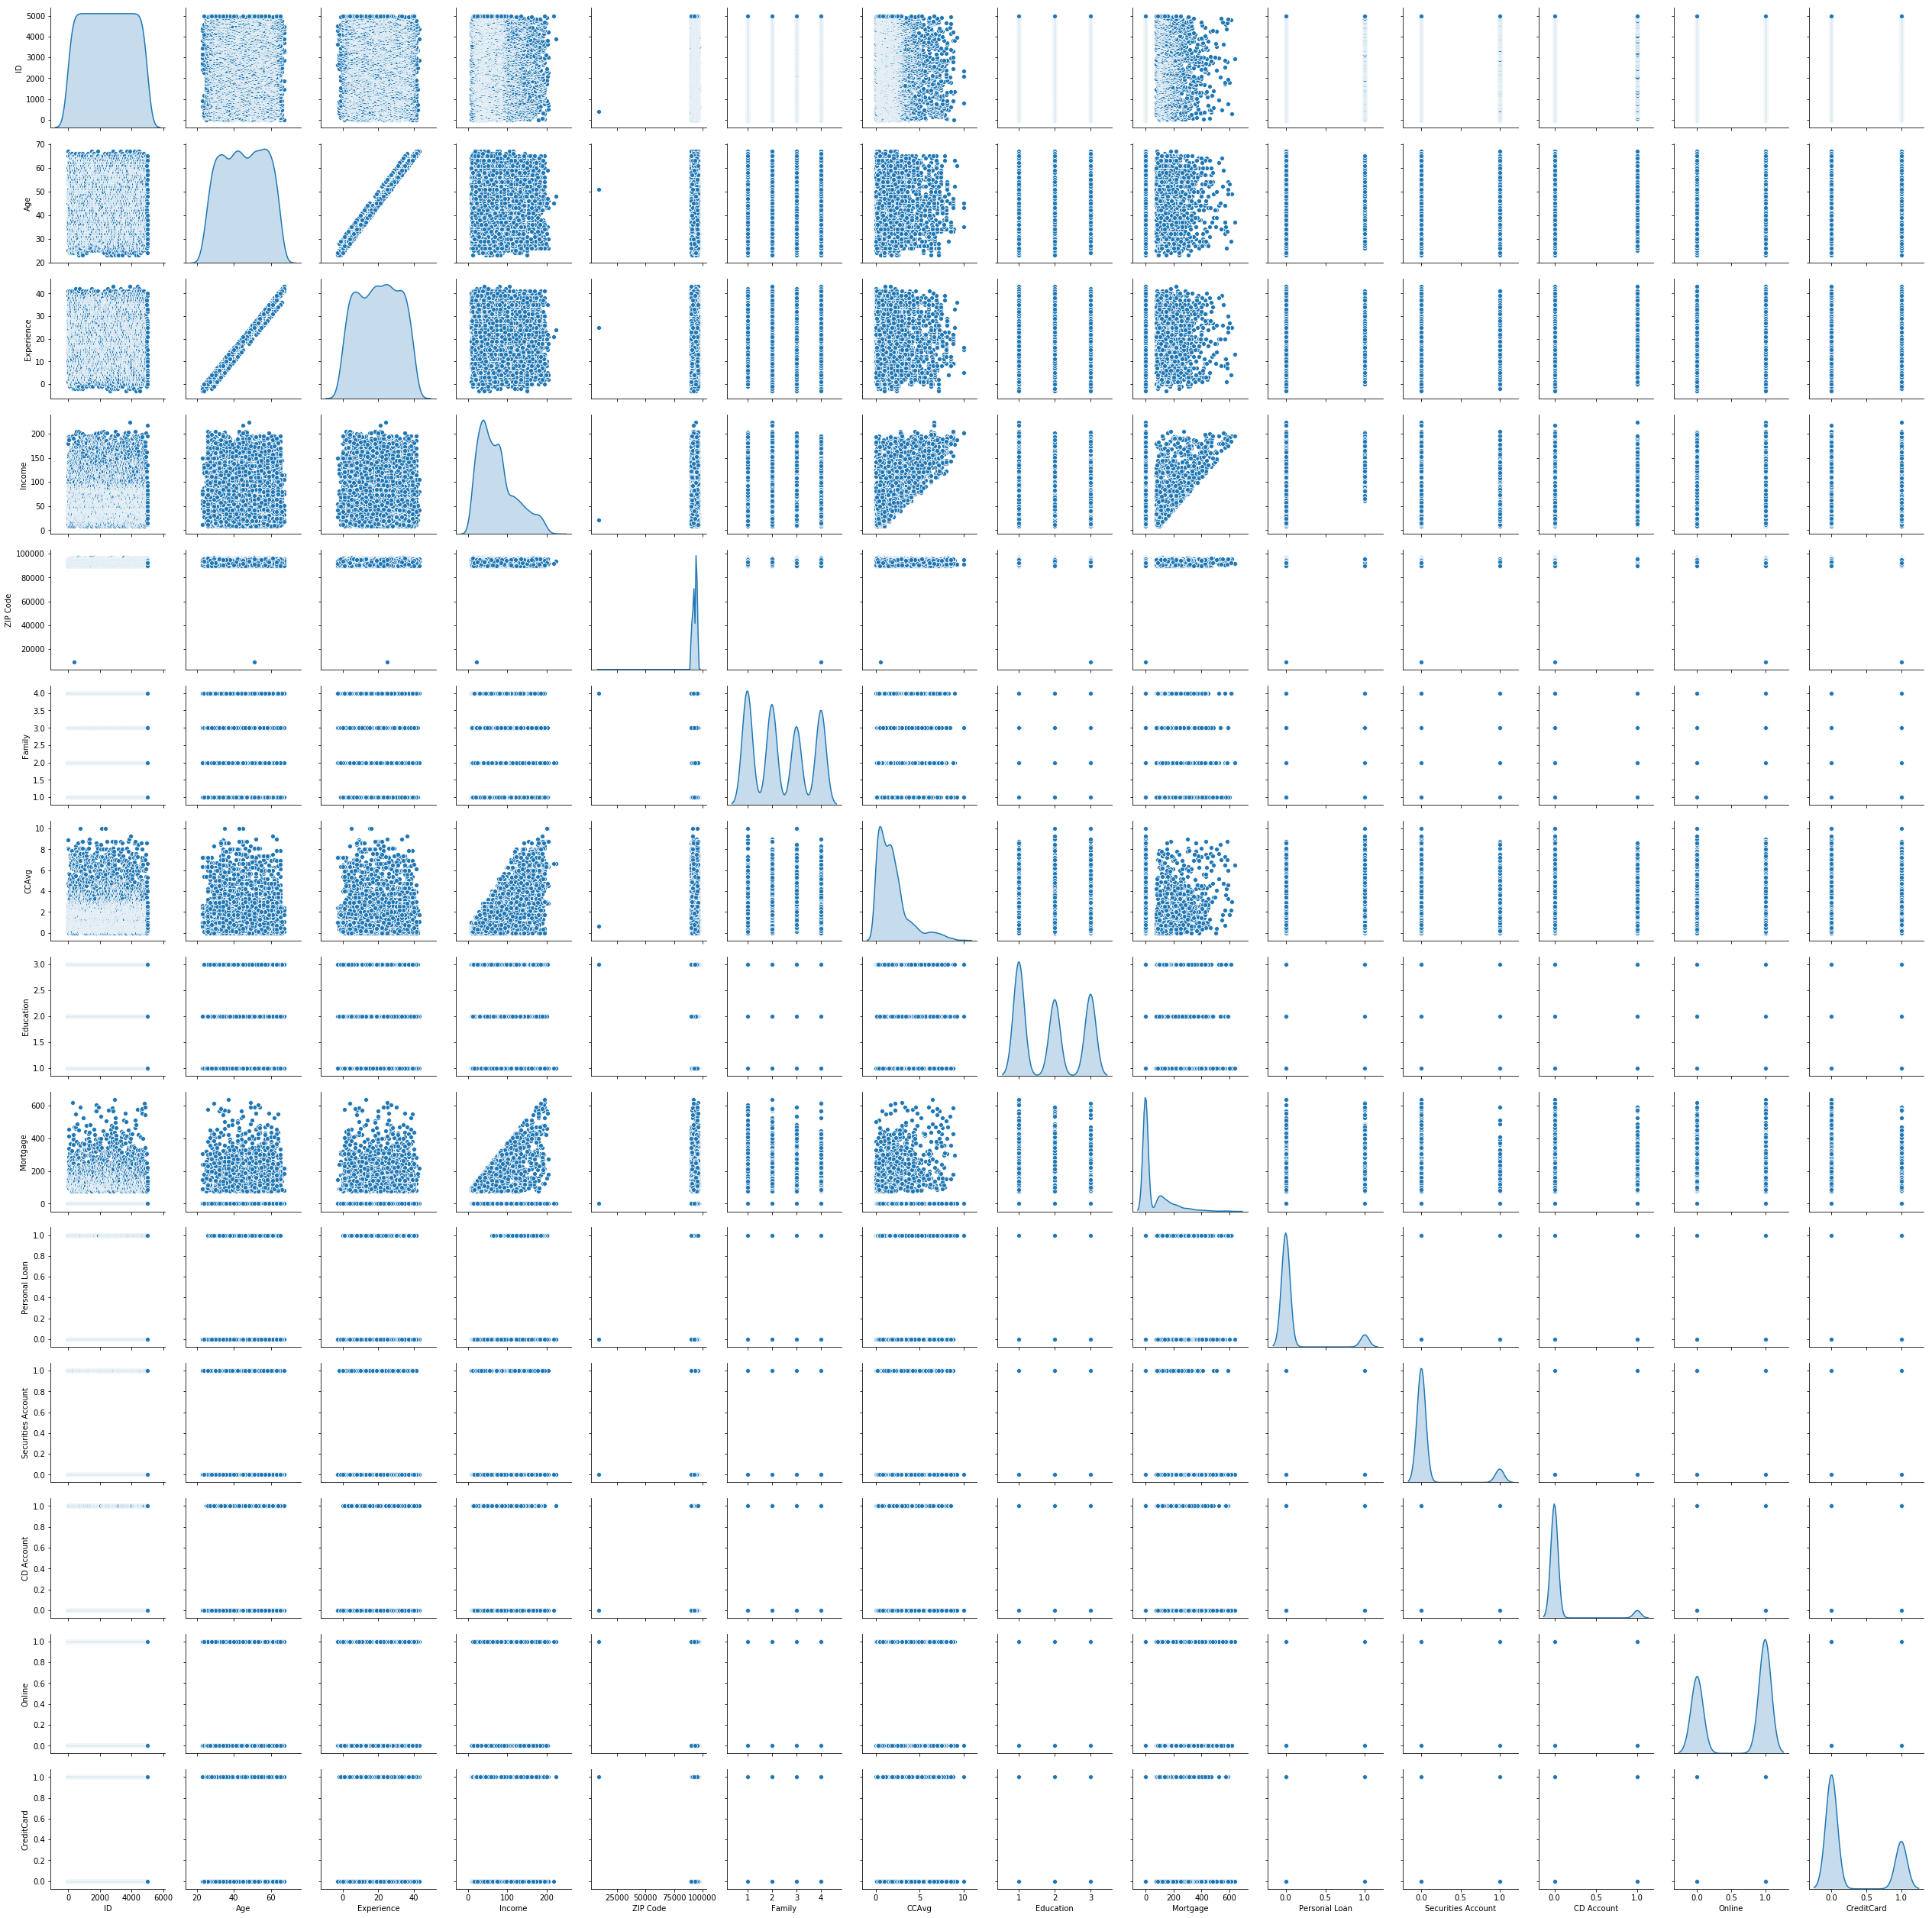

In [12]:
# Bivariate analysis
sns.pairplot(data,diag_kind='kde');

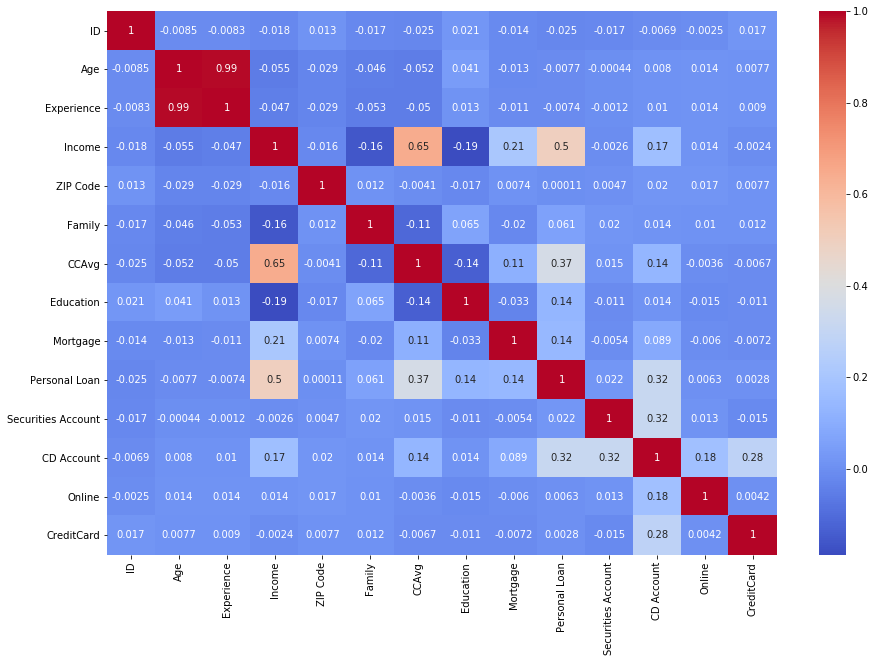

In [13]:
# Correlation analysis

# Set the figsize
fig, ax = plt.subplots(figsize=(15,10))

# Plot the heatmap
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm' );

In [14]:
# Get data model ready

# Drop the target colum from the x attributes
X = data.drop('Personal Loan',axis=1)     # Predictor feature columns

# Create the target attribute
Y = data['Personal Loan']   # Predicted class (1=True, 0=False)

**3.** Split the data into training and test set in the ratio of 70:30 respectively **(5 marks)**

In [23]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Print percentages of train and test data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))
print()

# Print original total values  for target variable in data set
print("Original Loans True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Loans False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")

# Print total values  for target variable in training data set
print("Training Loans True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loans False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")

# Print total values  for target variable in test data set
print("Test Loans True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loans False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

# Print first five rows of training data
x_train.head()

70.00% data is in training set
30.00% data is in test set

Original Loans True Values    : 480 (9.60%)
Original Loans False Values   : 4520 (90.40%)

Training Loans True Values    : 331 (9.46%)
Training Loans False Values   : 3169 (90.54%)

Test Loans True Values        : 149 (9.93%)
Test Loans False Values       : 1351 (90.07%)



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.30,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.00,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.80,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.80,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.20,2,0,0,0,1,0


**4.** Use Logistic Regression model to predict whether the customer will take personal loan or
not. Print all the metrics related for evaluating the model performance **(15 marks)**

In [24]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

# predict on test
y_predict = model.predict(x_test)

# Get the score
model_score = model.score(x_test, y_test)
print('accuracy %s' %(model_score))

# Run classification report
report = classification_report(y_test, y_predict)
print(report)

accuracy 0.908
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



In [26]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
r2 = metrics.r2_score(y_test, y_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.092
MSE is 0.092
R2 score is -0.028321054749402386


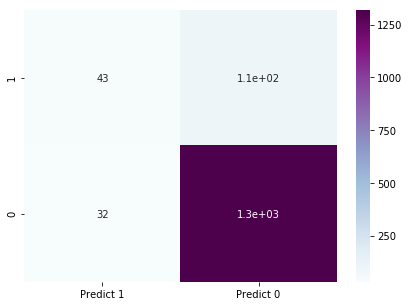

In [17]:
# Create confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap="BuPu");

**5.** Give your reasoning on how can the model perform better? **(10 marks)**
Hint: Check parameter

<div class="alert-info">
<b>Reasoning:</b> 
    
The negative R2 result in the previous step shows that we have a model the fits the data very poorly, so based on that fact we need to look at other model options.

The initial model used the "liblinear" solver, which is very efficient for small data sets like the one in the example, but that is not the only option so one easy way to start improving our model is to try different solvers. In the block below I tried the other solvers available for binary logistic regression, adding a cross validation parameter of 5, and analyzing the mean test score. The results showed a great improvement, going from .908 accuracy to 0.950 using the "newton-cg" solver. 
    
There low results in precision, recall, anf F1 for predictions of customers that will accept a loan are a concern, so we need to follow other strategies, for example looking at the imbalanced numbers in percentages of people having credit and not having it 70% vs 30%, maybe we could try to balance the data set by adding or reducing records, or even trying to use a different algorithm from Logistic Regression.
</div>

In [18]:
solver_list = ['newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34, max_iter=5000)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(x_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

  newton-cg 0.950
  lbfgs 0.919
  sag 0.907
  saga 0.906


**6.** Give Business understanding of your model? **(5 marks)**

<div class="alert-info">
<b>Business understanding:</b> 
The results of the ML model show 95% accuracy on predicting that a customer will not accept a loan in this second round with the parameters provided in the data, but as a consultant, I would still hold my report to the business owner just yet since I would like to still explore the other options to try to improve the model. The imbalanced data needs to be addressed so we can run a better model and predict more accurately the potential result of the offerings to the customers.
</div>